In [1]:
import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble,svm
from sklearn.metrics import accuracy_score

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
images_train.shape

(50000, 32, 32, 3)

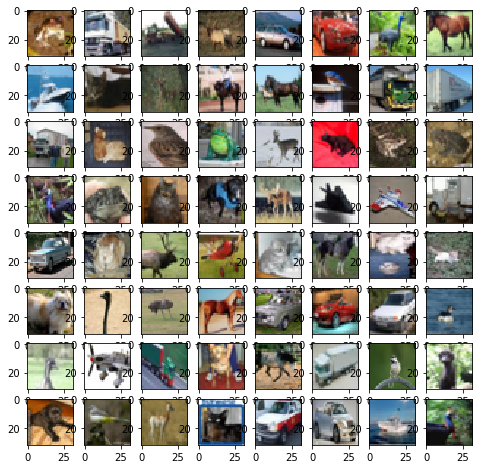

In [7]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap = plt.cm.bone)
plt.show()

In [8]:
ntrain_samples = 50000
ntest_samples = 10000
x_train = np.array([images_train[i].flatten() for i in range (ntrain_samples)])
x_test = np.array([images_test[i].flatten() for i in range (ntest_samples)])

In [9]:
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while (current_variance/total < 1):
    current_variance += pca.explained_variance_[k]
    k = k+1

In [11]:
pca = PCA(n_components = k)
x_transformed = pca.fit_transform(x_train)

In [12]:
x_approx = pca.inverse_transform(x_transformed)
x_approx_images = x_approx.reshape(-1,32,32,3)

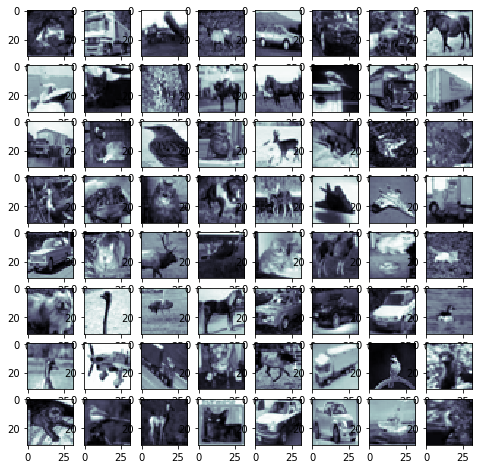

In [13]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i,:,:,-1],cmap = plt.cm.bone)
plt.show()

In [14]:
x_train_pca = x_transformed
x_test_pca = pca.transform(x_test)

In [ ]:
y_train,y_test = cls_train,cls_test

In [ ]:
#clf = ensemble.RandomForestClassifier(n_estimators = 100,max_depth = 100)
clf = svm.SVC(C=100,gamma=0.005)
clf.fit(x_train_pca,y_train)
y_pred = clf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
test = []
for i in range(10000):
    j = y_pred[i]
    test.append(class_names[j])

predictions = np.array(test)
np.savetxt("cifar10_predictions_test.csv",predictions,fmt="%s")